In [63]:
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv("coffee_shop_sample.csv")
print(df.columns)

Index(['transaction_date', 'transaction_time', 'customer_id', 'quantity',
       'line_item_amount', 'unit_price', 'product_group', 'product_category',
       'product_type', 'current_wholesale_price', 'customer_since',
       'customer_birth_year', 'customer_generation'],
      dtype='object')


In [65]:
df

,transaction_date,transaction_time,customer_id,quantity,line_item_amount,unit_price,product_group,product_category,product_type,current_wholesale_price,customer_since,customer_birth_year,customer_generation
0,2019-04-18,06:33:22,NaN,1,2.50,2.50,Beverages,Tea,Brewed herbal tea,0.63,NaN,NaN,NaN
1,2019-04-13,07:17:16,5655.0,1,3.00,3.00,Beverages,Tea,Brewed Black tea,0.75,2018-06-15,1993.0,Younger Millennials
2,2019-04-06,16:27:42,599.0,1,2.50,2.50,Beverages,Tea,Brewed Chai tea,0.63,2018-09-12,1988.0,Older Millennials
3,2019-04-17,06:47:08,5572.0,2,6.00,3.00,Beverages,Tea,Brewed herbal tea,0.75,2017-04-06,1956.0,Baby Boomers
4,2019-04-06,17:33:47,5555.0,2,7.00,3.50,Beverages,Coffee,Organic brewed coffee,0.70,2019-03-19,1999.0,Gen Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-04-09,19:58:13,642.0,1,3.75,3.75,Beverages,Drinking Chocolate,Hot chocolate,2.81,2018-12-10,1993.0,Younger Millennials
96,2019-04-09,08:08:00,NaN,1,4.38,4.38,Food,Bakery,Pastry,2.11,NaN,NaN,NaN
97,2019-04-25,16:59:43,5119.0,1,2.65,2.65,Food,Bakery,Scone,2.11,2017-03-31,1982.0,Older Millennials
98,2019-04-18,11:11:26,NaN,2,5.00,2.50,Beverages,Tea,Brewed herbal tea,0.63,NaN,NaN,NaN


In [66]:
unit_mean = df["unit_price"].mean()
print(unit_mean)

3.7432999999999996


In [67]:
def get_locs(col, type):
    count = 0
    loc = []
    for i in range(len(df)):
        if df[col][i] == type:
            count += 1
            loc.append(i)
    return loc



In [68]:
def get_mean(col, type):
    loc = get_locs(col= col,type=type)
    mean = 0
    total = 0
    for i in loc:
        total += df["unit_price"][i]
        mean = total/len(loc)
    return mean



In [70]:
print(f"food average: {get_mean(col='product_group', type='Food')}")
print(f"beverage average: {get_mean(col='product_group', type='Beverages')}")


food average: 3.652
beverage average: 3.1212499999999994


In [71]:
def generation_data(col):
    unique_genertions = df["customer_generation"].unique()
    gen_data = {}
    for generation in unique_genertions:
        gen_data[generation] = []
    for i in range(len(df)):
        generation = df["customer_generation"][i]
        gen_data[generation].append(df[col][i])
    gen_mean = {}
    for generation in unique_genertions:
        gen_mean[generation] = sum(gen_data[generation])/len(gen_data[generation])
    gen_total = {}
    for generation in unique_genertions:
        gen_total[generation] = len(gen_data[generation])
    
    
    return gen_data, gen_mean, gen_total

gen_data, gen_mean, gen_total = generation_data(col="unit_price")
gen_mean

{nan: np.float64(3.3933333333333326),
 'Younger Millennials': np.float64(7.040909090909091),
 'Older Millennials': np.float64(3.019230769230769),
 'Baby Boomers': np.float64(3.1944444444444446),
 'Gen Z': np.float64(3.35),
 'Gen X': np.float64(3.64375)}

In [72]:
total_gen_z = gen_total.get("Gen Z") 
total_nan = gen_total.get(np.nan)      

gen_Z = (total_gen_z / (len(df) - total_nan))*100
gen_Z

21.153846153846153

In [73]:
def generation_data(col1,col2):
    unique_genertions = df[col1].unique()
    gen_data = {}
    for generation in unique_genertions:
        gen_data[generation] = []
    for i in range(len(df)):
        generation = df[col1][i]
        gen_data[generation].append(df[col2][i])
    gen_mean = {}
    for generation in unique_genertions:
        gen_mean[generation] = sum(gen_data[generation])/len(gen_data[generation])
    gen_total = {}
    for generation in unique_genertions:
        gen_total[generation] = len(gen_data[generation])
    return gen_data, gen_mean, gen_total

gen_data, gen_mean, gen_total = generation_data(col1="customer_generation", col2="unit_price")
gen_mean

{nan: np.float64(3.3933333333333326),
 'Younger Millennials': np.float64(7.040909090909091),
 'Older Millennials': np.float64(3.019230769230769),
 'Baby Boomers': np.float64(3.1944444444444446),
 'Gen Z': np.float64(3.35),
 'Gen X': np.float64(3.64375)}

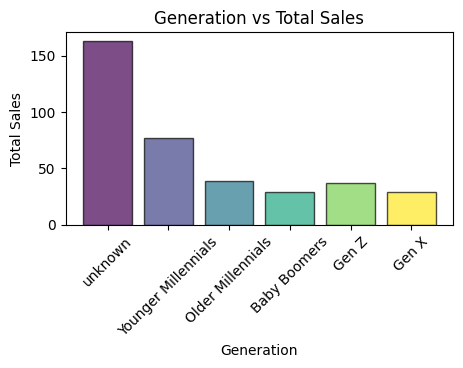

In [74]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.viridis(np.linspace(0, 1, len(gen_data)))

heights = [gen_total[generation] * gen_mean[generation] for generation in gen_data]
plt.figure(figsize=(5, 2.5))
plt.bar(x=df["customer_generation"].fillna("unknown").unique(), height=heights, color=colors, alpha=0.7, edgecolor='black')
plt.title("Generation vs Total Sales")
plt.xlabel("Generation")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


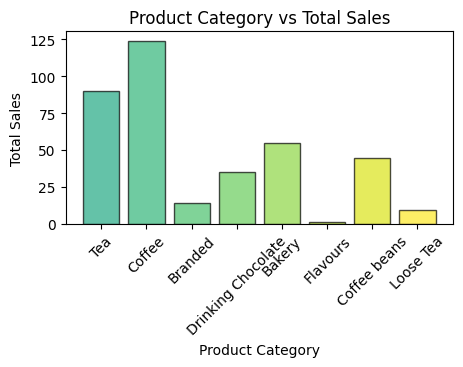

In [75]:
prod_data, prod_mean, prod_total = generation_data(col1="product_category", col2="unit_price")
heights_prod = [prod_total[category] * prod_mean[category] for category in prod_data]

colors = plt.cm.viridis(np.linspace(0.6, 1, len(prod_data)))  

plt.figure(figsize=(5, 2.5))
plt.bar(x=df["product_category"].fillna("unknown").unique(), height=heights_prod, alpha=0.7, color=colors, edgecolor='black')
plt.title("Product Category vs Total Sales")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()